In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_excel(r'19CSE305_LabData_Set3.1.xlsx',sheet_name = "thyroid0387_UCI" )
df

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


A1

In [3]:
df.columns

Index(['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')

In [4]:
df.iloc[0]

Record ID                       840801013
age                                    29
sex                                     F
on thyroxine                            f
query on thyroxine                      f
on antithyroid medication               f
sick                                    f
pregnant                                f
thyroid surgery                         f
I131 treatment                          f
query hypothyroid                       t
query hyperthyroid                      f
lithium                                 f
goitre                                  f
tumor                                   f
hypopituitary                           f
psych                                   f
TSH measured                            t
TSH                                   0.3
T3 measured                             f
T3                                      ?
TT4 measured                            f
TT4                                     ?
T4U measured                      

In [5]:
attribute_types = {}

for column_name, data_type in zip(df.columns, df.dtypes):
    if data_type == 'object':
        attribute_type = 'Nominal'
    elif data_type == 'int64':
        attribute_type = 'Ordinal or Continuous'
    elif data_type == 'float64':
        attribute_type = 'Continuous'
    else:
        attribute_type = 'Unknown'

    attribute_types[column_name] = attribute_type
    print(f"Attribute: {column_name}, Data Type: {data_type}, Attribute Type: {attribute_type}")

Attribute: Record ID, Data Type: int64, Attribute Type: Ordinal or Continuous
Attribute: age, Data Type: int64, Attribute Type: Ordinal or Continuous
Attribute: sex, Data Type: object, Attribute Type: Nominal
Attribute: on thyroxine, Data Type: object, Attribute Type: Nominal
Attribute: query on thyroxine, Data Type: object, Attribute Type: Nominal
Attribute: on antithyroid medication, Data Type: object, Attribute Type: Nominal
Attribute: sick, Data Type: object, Attribute Type: Nominal
Attribute: pregnant, Data Type: object, Attribute Type: Nominal
Attribute: thyroid surgery, Data Type: object, Attribute Type: Nominal
Attribute: I131 treatment, Data Type: object, Attribute Type: Nominal
Attribute: query hypothyroid, Data Type: object, Attribute Type: Nominal
Attribute: query hyperthyroid, Data Type: object, Attribute Type: Nominal
Attribute: lithium, Data Type: object, Attribute Type: Nominal
Attribute: goitre, Data Type: object, Attribute Type: Nominal
Attribute: tumor, Data Type: ob

In [6]:
for column_name, attribute_type in attribute_types.items():
    if attribute_type == 'Ordinal':
        # Apply label encoding for ordinal variables
        df[column_name] = pd.Categorical(df[column_name], categories=df[column_name].unique(), ordered=True).codes
    elif attribute_type == 'Nominal':
        # Apply one-hot encoding for nominal variables
        df = pd.get_dummies(df, columns=[column_name], prefix=[column_name])

# Print the updated DataFrame
print(df)


     Record ID  age  sex_?  sex_F  sex_M  on thyroxine_f  on thyroxine_t  \
0    840801013   29  False   True  False            True           False   
1    840801014   29  False   True  False            True           False   
2    840801042   41  False   True  False            True           False   
3    840803046   36  False   True  False            True           False   
4    840803047   32  False   True  False            True           False   
..         ...  ...    ...    ...    ...             ...             ...   
995  841031002   41  False   True  False            True           False   
996  841031010   41  False   True  False            True           False   
997  841031030   20  False   True  False            True           False   
998  841031031   20  False   True  False            True           False   
999  841031032   73  False   True  False            True           False   

     query on thyroxine_f  query on thyroxine_t  on antithyroid medication_f  \
0      

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

data_ranges = {}
for column_name in numeric_columns.columns:
    min_value = numeric_columns[column_name].min()
    max_value = numeric_columns[column_name].max()
    data_ranges[column_name] = (min_value, max_value)

# Print the data ranges
for column_name, (min_value, max_value) in data_ranges.items():
    print(f"Attribute: {column_name}, Min Value: {min_value}, Max Value: {max_value}")

Attribute: Record ID, Min Value: 840801013, Max Value: 841031032
Attribute: age, Min Value: 1, Max Value: 97


In [8]:
missing_values = df.isetitem().sum()


for column_name, missing_count in missing_values.items():
    print(f"Attribute: {column_name}, Missing Values Count: {missing_count}")

TypeError: DataFrame.isetitem() missing 2 required positional arguments: 'loc' and 'value'

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])


Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1


outlier_multiplier = 1.5


outliers = ((numeric_columns < (Q1 - outlier_multiplier * IQR)) |
            (numeric_columns > (Q3 + outlier_multiplier * IQR)))


outlier_counts = outliers.sum()
print("Number of Outliers in Each Numeric Column:")
print(outlier_counts)

outlier_rows = df[outliers.any(axis=1)]
print("\nRows Containing Outliers:")
print(outlier_rows)


In [ ]:
numeric_columns = df.select_dtypes(include=['int64'])


means = numeric_columns.mean()

variances = numeric_columns.var()

standard_deviations = numeric_columns.std()


print("Mean Values for Numeric Columns:")
print(means)

print("\nVariance Values for Numeric Columns:")
print(variances)

print("\nStandard Deviation Values for Numeric Columns:")
print(standard_deviations)

In [16]:


scaler = StandardScaler()

normalized_data = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

data = data.drop(columns=numeric_columns.columns)

normalized_data = pd.concat([data, normalized_data], axis=1)



AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [11]:
if f01 + f10 + f11 == 0:
        jaccard_coefficient = 0
else:
        jaccard_coefficient = f11 / (f01 + f10 + f11)

        
        simple_matching_coefficient = (f11 + f00) / (f00 + f01 + f10 + f11)

        vector1_np = np.array(vector1).reshape(1, -1)
        vector2_np = np.array(vector2).reshape(1, -1)
        cosine_sim = cosine_similarity(vector1_np, vector2_np)[0][0]

        
        jaccard_matrix[i][j] = jaccard_coefficient
        smc_matrix[i][j] = simple_matching_coefficient
        cosine_matrix[i][j] = cosine_sim

plt.figure(figsize=(10, 7))
sns.heatmap(jaccard_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")
plt.show()


NameError: name 'f01' is not defined

In [ ]:


feature_vectors = data[:, 1].reshape(-1, 1)
cosine_sim_matrix = cosine_similarity(feature_vectors, feature_vectors)

print(cosine_sim_matrix)


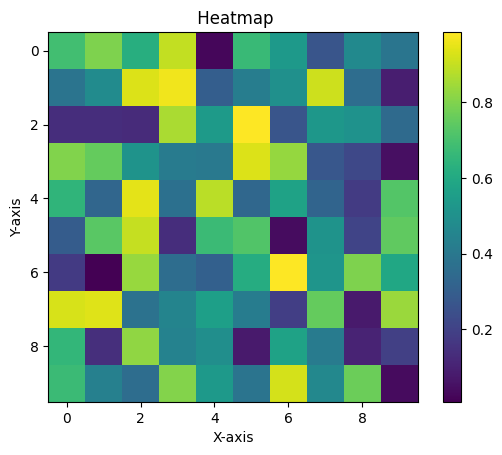

In [15]:


data = np.random.rand(10, 10)

plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(' Heatmap')

plt.show()
